In [40]:
import os
import pickle
from variational.exponential_family import GenericMeanFieldNormalDistribution, NormalDistribution, MeanFieldNormalDistribution
from experiments.logisticRegression.utils import get_tgt_log_density, get_dataset
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np

flipped_predictors = get_dataset(dataset="Sonar")
N, dim = flipped_predictors.shape

# Gaussian Prior
my_prior_covariance = 25 * jnp.identity(dim)
my_prior_covariance = my_prior_covariance.at[0, 0].set(400)
my_prior_log_density = NormalDistribution(jnp.zeros(dim), my_prior_covariance).log_density
tgt_log_density = jax.vmap(get_tgt_log_density(flipped_predictors, my_prior_log_density))

PKLs = []
PKL_titles = []
for file in os.listdir("./"):
    if file.endswith(".pkl"):
        PKLs.append(pickle.load(open(file, "rb")))
        PKL_titles.append(str(file))

full_gaussian = GenericMeanFieldNormalDistribution(dimension=dim)


In [41]:
lossesPKLs = []
lossesPKL_titles = []
for file in os.listdir("./losses/"):
    if file.endswith(".pkl"):
        lossesPKLs.append(pickle.load(open("./losses/"+file, "rb")))
        lossesPKL_titles.append(str(file))

Text(0.5, 1.0, 'testpourlossasuppr_heuristic_gaussian_Nicolas_1000_10000_Seq1_[0 0]_loss.pkl')

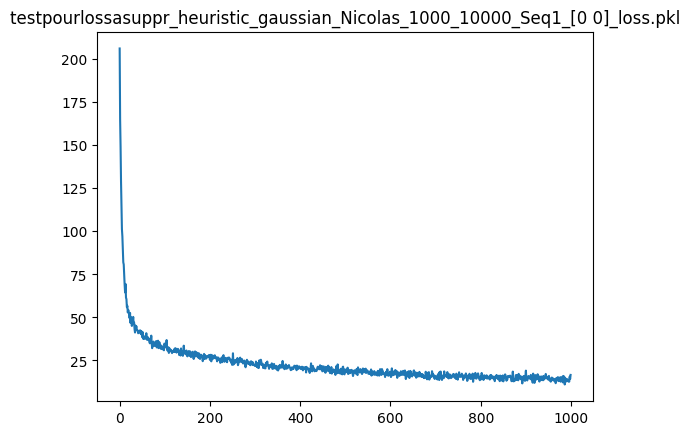

In [4]:
idx=1
plt.plot(lossesPKLs[idx][1:])
plt.title(lossesPKL_titles[idx])


In [93]:
lossesPKL_titles

['gaussian_meanfield_ngd_1000_10000_Seq_loss.pkl',
 'heuristic_gaussian_Nicolas_1000_10000_Seq1u10_[0 4]_loss.pkl',
 'heuristic_gaussian_Nicolas_1000_10000_Seq1u1_[0 4]_loss.pkl',
 'gaussianMeanField_Nicolas_1000_10000_Seq2_[0 0].pkl_loss.pkl']

In [ ]:
np.savetxt('loss_1e3_1e3_heuristic_mfg_sonar.csv', np.array([np.arange(1, 1000+1), lossesPKLs[2][1:]]).T, delimiter=",")
np.savetxt('loss_1e3_1e3_Seq2_mfg_sonar.csv', np.array([np.arange(1, 1000+1), lossesPKLs[-1][1:]]).T, delimiter=",")

<ErrorbarContainer object of 3 artists>

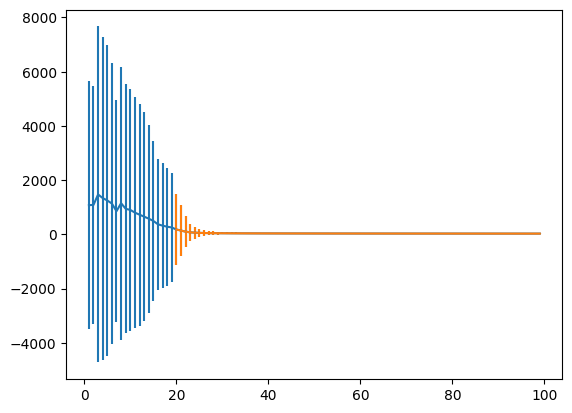

In [7]:
plt.errorbar(x=np.arange(1, 100),y=lossesPKLs[0][:,1:100].mean(axis=0), yerr=lossesPKLs[0][:,1:100].std(axis=0))

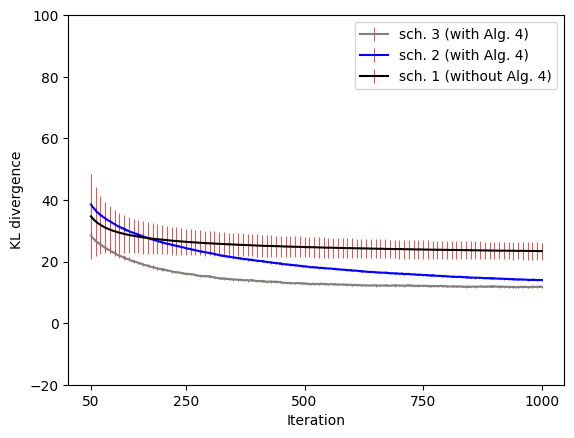

In [109]:
ecolors = ["black", "red", "red", "red"]
colors = ["orange", "gray", "blue", "black"]
labels = ["NGD (sch. 1)","sch. 3 (with Alg. 4)", "sch. 2 (with Alg. 4)", "sch. 1 (without Alg. 4)"]
start = 50
end = 1001
l = np.array([lossesPKLs[0][k] for k in range(len(lossesPKLs[0])) if np.sum(np.isnan(lossesPKLs[0][k]))==0])
lossesPKLs[0] = l
for idx in range(1,4):
    plt.errorbar(x=np.arange(start, end),y=lossesPKLs[idx][:,start:end].mean(axis=0), 
             yerr=lossesPKLs[idx][:,start:end].std(axis=0), ecolor=ecolors[idx], errorevery=10, color=colors[idx],
                elinewidth=0.5, label=labels[idx])
plt.xticks([50, 250, 500, 750, 1000])
plt.ylim(-20, 100)
plt.xlabel("Iteration")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig("mean_std_sonar_mfg_starting_from_50.pdf")

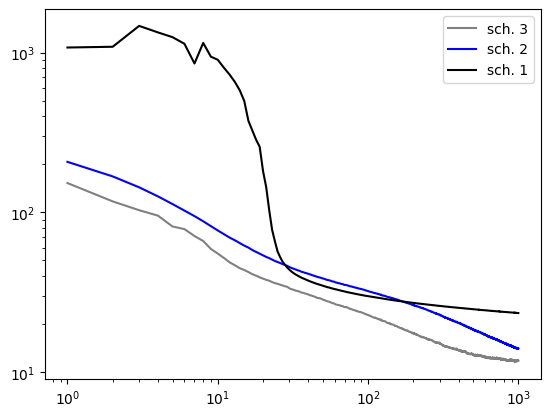

In [42]:
for idx in range(3):
    plt.loglog(np.arange(1, 1000), lossesPKLs[idx][:,1:1000].mean(axis=0), color=colors[idx],
              label=labels[idx])
plt.legend()
plt.savefig("loglogplot_mean_sonar_mfg.pdf")

In [13]:
for idx in range(3):
    plt.loglog(np.arange(1, 1000), lossesPKLs[idx][:,1:1000].mean(axis=0), color=colors[idx])

['heuristic_gaussian_Nicolas_1000_10000_Seq1u10_[0 4]_loss.pkl',
 'heuristic_gaussian_Nicolas_1000_10000_Seq1u1_[0 4]_loss.pkl',
 'gaussianMeanField_Nicolas_1000_10000_Seq2_[0 0].pkl_loss.pkl']

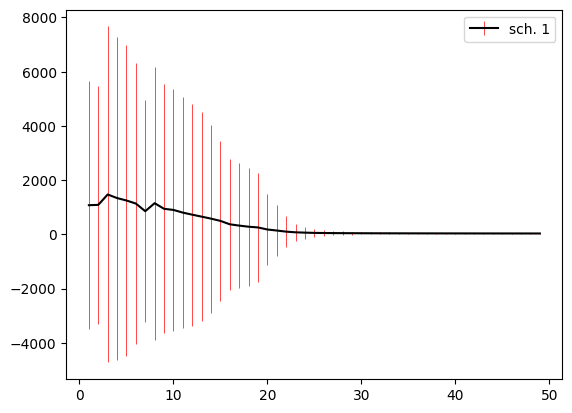

In [51]:
ecolors = ["red", "red", "red"]
colors = ["gray", "blue", "black"]
labels = ["sch. 3", "sch. 2", "sch. 1 (without Alg. 4)"]
start = 1
end = 50
for idx in range(2,3):
    plt.errorbar(x=np.arange(start, end),y=lossesPKLs[idx][:,start:end].mean(axis=0), 
             yerr=lossesPKLs[idx][:,start:end].std(axis=0), ecolor=ecolors[idx], errorevery=1, color=colors[idx],
                elinewidth=0.5, label=labels[idx])
plt.legend()
plt.savefig("mean_std_sonar_mfg_starting_from_1_50_sc1.pdf")

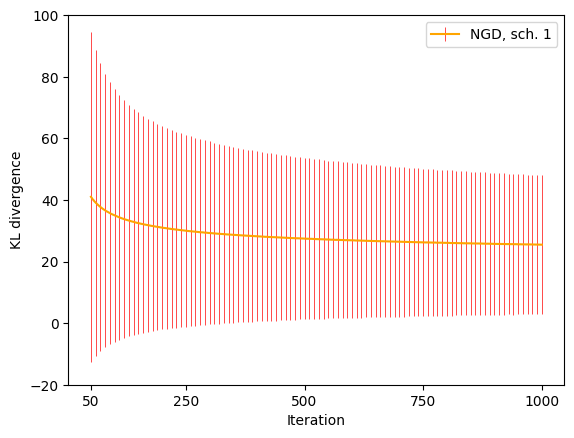

In [95]:
ecolors = ["red", "red", "red", "red"]
colors = ["orange", "gray", "blue", "black"]
labels = ["NGD, sch. 1","sch. 3 (with Alg. 4)", "sch. 2 (with Alg. 4)", "sch. 1 (without Alg. 4)"]
start = 50
end = 1001
for idx in range(1):
    plt.errorbar(x=np.arange(start, end),y=lossesPKLs[idx][:,start:end].mean(axis=0), 
             yerr=lossesPKLs[idx][:,start:end].std(axis=0), ecolor=ecolors[idx], errorevery=10, color=colors[idx],
                elinewidth=0.5, label=labels[idx])
plt.xticks([50, 250, 500, 750, 1000])
plt.ylim(-20, 100)
plt.xlabel("Iteration")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig("mean_std_sonar_mfg_starting_from_50_ngd.pdf")

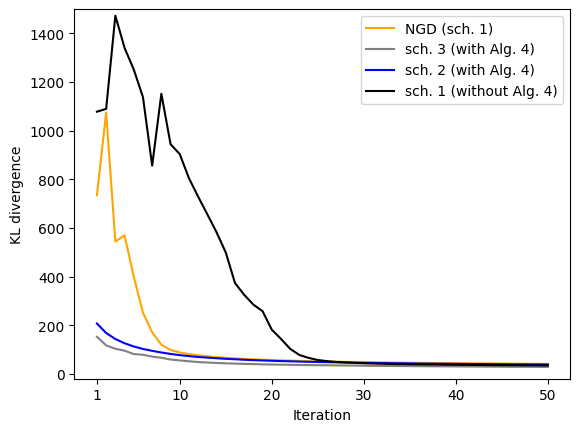

In [110]:
ecolors = ["black", "red", "red", "red"]
colors = ["orange", "gray", "blue", "black"]
labels = ["NGD (sch. 1)","sch. 3 (with Alg. 4)", "sch. 2 (with Alg. 4)", "sch. 1 (without Alg. 4)"]
start = 1
end = 51
l = np.array([lossesPKLs[0][k] for k in range(len(lossesPKLs[0])) if np.sum(np.isnan(lossesPKLs[0][k]))==0])
lossesPKLs[0] = l
for idx in range(4):
    plt.plot(np.arange(start, end),lossesPKLs[idx][:,start:end].mean(axis=0), 
              color=colors[idx],label=labels[idx])
plt.xticks([1, 10, 20, 30, 40, 50])
plt.ylim(-20, 1500)
plt.xlabel("Iteration")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig("mean_sonar_mfg_starting_upto50_plusngd.pdf")

/tmp/ipykernel_379978/1187428469.py:12: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-20, 1500)


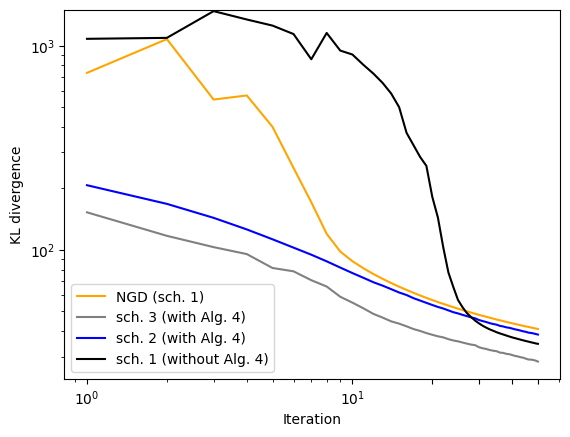

In [107]:
ecolors = ["black", "red", "red", "red"]
colors = ["orange", "gray", "blue", "black"]
labels = ["NGD (sch. 1)","sch. 3 (with Alg. 4)", "sch. 2 (with Alg. 4)", "sch. 1 (without Alg. 4)"]
start = 1
end = 51
l = np.array([lossesPKLs[0][k] for k in range(len(lossesPKLs[0])) if np.sum(np.isnan(lossesPKLs[0][k]))==0])
lossesPKLs[0] = l
for idx in range(4):
    plt.loglog(np.arange(start, end),lossesPKLs[idx][:,start:end].mean(axis=0), 
              color=colors[idx],label=labels[idx])
plt.xticks([1, 10, 20, 30, 40, 50])
plt.ylim(-20, 1500)
plt.xlabel("Iteration")
plt.ylabel("KL divergence")
plt.legend()
plt.savefig("loglogmean_sonar_mfg_starting_upto50_plusngd.pdf")

In [53]:
lossesPKLs[0].shape

(100, 1001)

In [69]:
lossesPKLs[1][0][1:1000].shape

(999,)